In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 0. Data Loading

Load the pre-cleaned dataset and perform minimal cleaning (remove duplicates and missing values).

# 🚗 Used Car Price Prediction - Decision Tree Model

**Objective:** Build a simple tree-based regression model using Decision Tree to predict used car prices

**Project Pipeline:**
1. **Data Loading** - Load pre-cleaned dataset
2. **Feature Engineering** - Create Car_Age, encode Make & State
3. **Model Training** - Decision Tree with 4 key features
4. **Production Model** - Fast, interpretable tree model (used in app.py)

**Key Metrics:** R² Score, MAE (Mean Absolute Error), RMSE

**Why Decision Tree?**
- Fast training (single tree)
- Easy to interpret and visualize
- Captures non-linear relationships
- No assumptions about data distribution
- Good middle ground between linear and ensemble models

In [2]:
# Load Pre-cleaned Data
df = pd.read_csv("true_car_listings.csv")
print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")

# Quick data cleaning (minimal)
df_clean = df.drop_duplicates().dropna().reset_index(drop=True)
print(f"Clean dataset: {df_clean.shape[0]:,} rows")

Dataset loaded: 852,092 rows, 8 columns
Clean dataset: 852,092 rows
Clean dataset: 852,092 rows


## 1. Feature Engineering

**Created Features:**

1. **Car_Age** = 2025 - Year  
   More intuitive than raw year. Older cars depreciate more.

2. **Make_Encoded** (LabelEncoder)  
   Converts brand names to numbers (Ferrari=13, Ford=49)  
   Captures brand premium in pricing

3. **State_Encoded** (LabelEncoder)  
   Converts states to numbers to capture regional price variations

**Final Features:** Car_Age, Mileage, Make_Encoded, State_Encoded (4 features)

In [3]:
# Feature Engineering
print("=== FEATURE ENGINEERING ===\n")

# Create Car_Age feature
df_clean['Car_Age'] = 2025 - df_clean['Year']
print(f"✓ Created Car_Age feature (Range: {df_clean['Car_Age'].min()}-{df_clean['Car_Age'].max()} years)")

# Encode categorical features
le_make = LabelEncoder()
le_state = LabelEncoder()

df_clean['Make_Encoded'] = le_make.fit_transform(df_clean['Make'])
df_clean['State_Encoded'] = le_state.fit_transform(df_clean['State'])

print(f"✓ Encoded {df_clean['Make'].nunique()} car makes (brands)")
print(f"✓ Encoded {df_clean['State'].nunique()} US states")

print(f"\n✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)")
print(f"✓ Dataset ready: {df_clean.shape[0]:,} rows")

=== FEATURE ENGINEERING ===

✓ Created Car_Age feature (Range: 7-28 years)
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states

✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)
✓ Dataset ready: 852,092 rows
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states

✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)
✓ Dataset ready: 852,092 rows


## 2. Model Training - Decision Tree

**Configuration (aligned with production model.py):**
- **Features:** Car_Age, Mileage, Make_Encoded, State_Encoded
- **Algorithm:** Decision Tree Regressor
- **Max Depth:** 15 (limits tree complexity)
- **Split:** 80% training, 20% testing

**Why Decision Tree?**
- **Speed:** Faster than ensemble methods (single tree)
- **Non-linear:** Captures complex patterns via splits
- **Interpretable:** Can visualize decision rules
- **Flexible:** No feature scaling required
- **Simple:** Easier to understand than Random Forest

In [4]:
print("="*80)
print("TRAINING DECISION TREE MODEL")
print("="*80)

# Use same features as production (model.py)
features = ['Car_Age', 'Mileage', 'Make_Encoded', 'State_Encoded']
X = df_clean[features]
y = df_clean['Price']

print(f"\nFeatures: {', '.join(features)}")

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]:,} | Testing samples: {X_test.shape[0]:,}")

# Train Decision Tree (aligned with model.py)
print("\nTraining Decision Tree...")
model = DecisionTreeRegressor(
    max_depth=15,      # Same as model.py
    random_state=42    # Same as model.py
)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n📊 PERFORMANCE METRICS")
print(f"   R² Train:  {r2_train:.4f}")
print(f"   R² Test:   {r2_test:.4f}")
print(f"   MAE:       ${mae_test:,.2f}")
print(f"   RMSE:      ${rmse_test:,.2f}")
print(f"   Gap:       {r2_train - r2_test:.4f}")
print("="*80)

TRAINING DECISION TREE MODEL

Features: Car_Age, Mileage, Make_Encoded, State_Encoded
Training samples: 681,673 | Testing samples: 170,419

Training Decision Tree...
Training samples: 681,673 | Testing samples: 170,419

Training Decision Tree...

📊 PERFORMANCE METRICS
   R² Train:  0.6569
   R² Test:   0.5512
   MAE:       $5,815.96
   RMSE:      $9,066.35
   Gap:       0.1057

📊 PERFORMANCE METRICS
   R² Train:  0.6569
   R² Test:   0.5512
   MAE:       $5,815.96
   RMSE:      $9,066.35
   Gap:       0.1057


## 3. Feature Importance Analysis

**Understanding Tree Decisions:**

Feature importance shows which variables the tree uses most for splits:

- **Car_Age & Mileage:** Primary depreciation factors (physical wear)
- **Make_Encoded:** Brand value/reputation (Ferrari vs Ford)
- **State_Encoded:** Regional market differences (CA vs TX)

**Note:** Decision Trees provide built-in feature importance based on split quality and frequency.

=== FEATURE IMPORTANCE ===

      Feature  Importance  Importance_Percent
 Make_Encoded    0.527376           52.737555
      Mileage    0.340332           34.033227
      Car_Age    0.106762           10.676153
State_Encoded    0.025531            2.553065


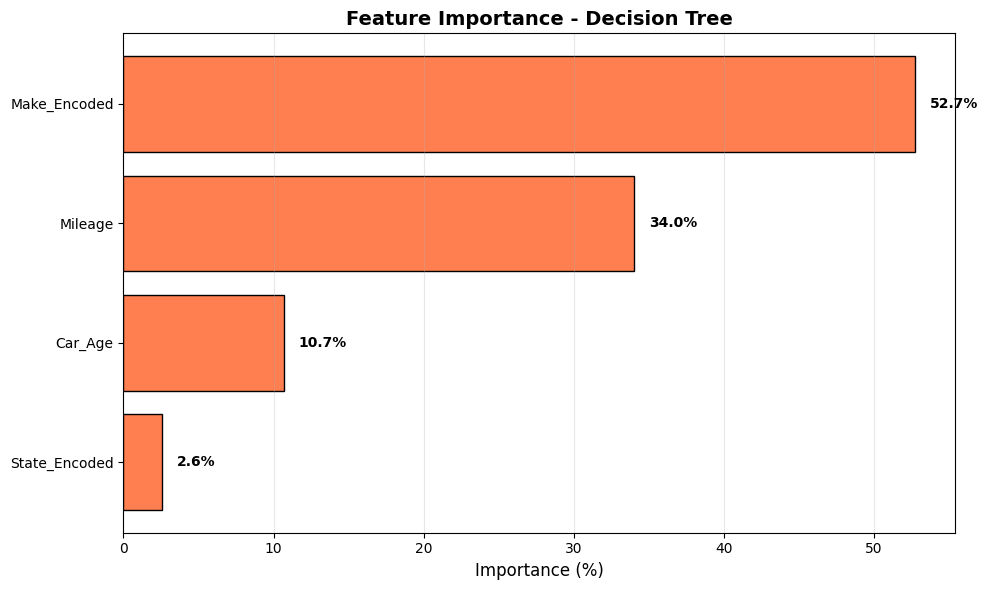

In [5]:
# Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_,
    'Importance_Percent': model.feature_importances_ * 100
}).sort_values('Importance', ascending=True)  # Ascending for correct barh display

print("=== FEATURE IMPORTANCE ===\n")
print(importance_df.sort_values('Importance', ascending=False).to_string(index=False))  # Print in descending order

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_Percent'], color='coral', edgecolor='black')
plt.xlabel('Importance (%)', fontsize=12)
plt.title('Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

for i, (feat, imp) in enumerate(zip(importance_df['Feature'], importance_df['Importance_Percent'])):
    plt.text(imp + 1, i, f'{imp:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Model Evaluation & Visualization

**Performance Metrics:**
- **R² Score:** How well the model explains price variance (0-1, higher is better)
- **MAE:** Average prediction error in dollars (lower is better)
- **RMSE:** Penalizes large errors more heavily (lower is better)

**Visualizations:**
1. **Actual vs Predicted:** Shows prediction accuracy
2. **Residual Plot:** Reveals systematic errors (should be random)
3. **Feature Importance:** Shows which features drive predictions
4. **Error Distribution:** Shows prediction error patterns

**Overfitting Check:** Compare training vs testing performance (gap should be < 0.10)

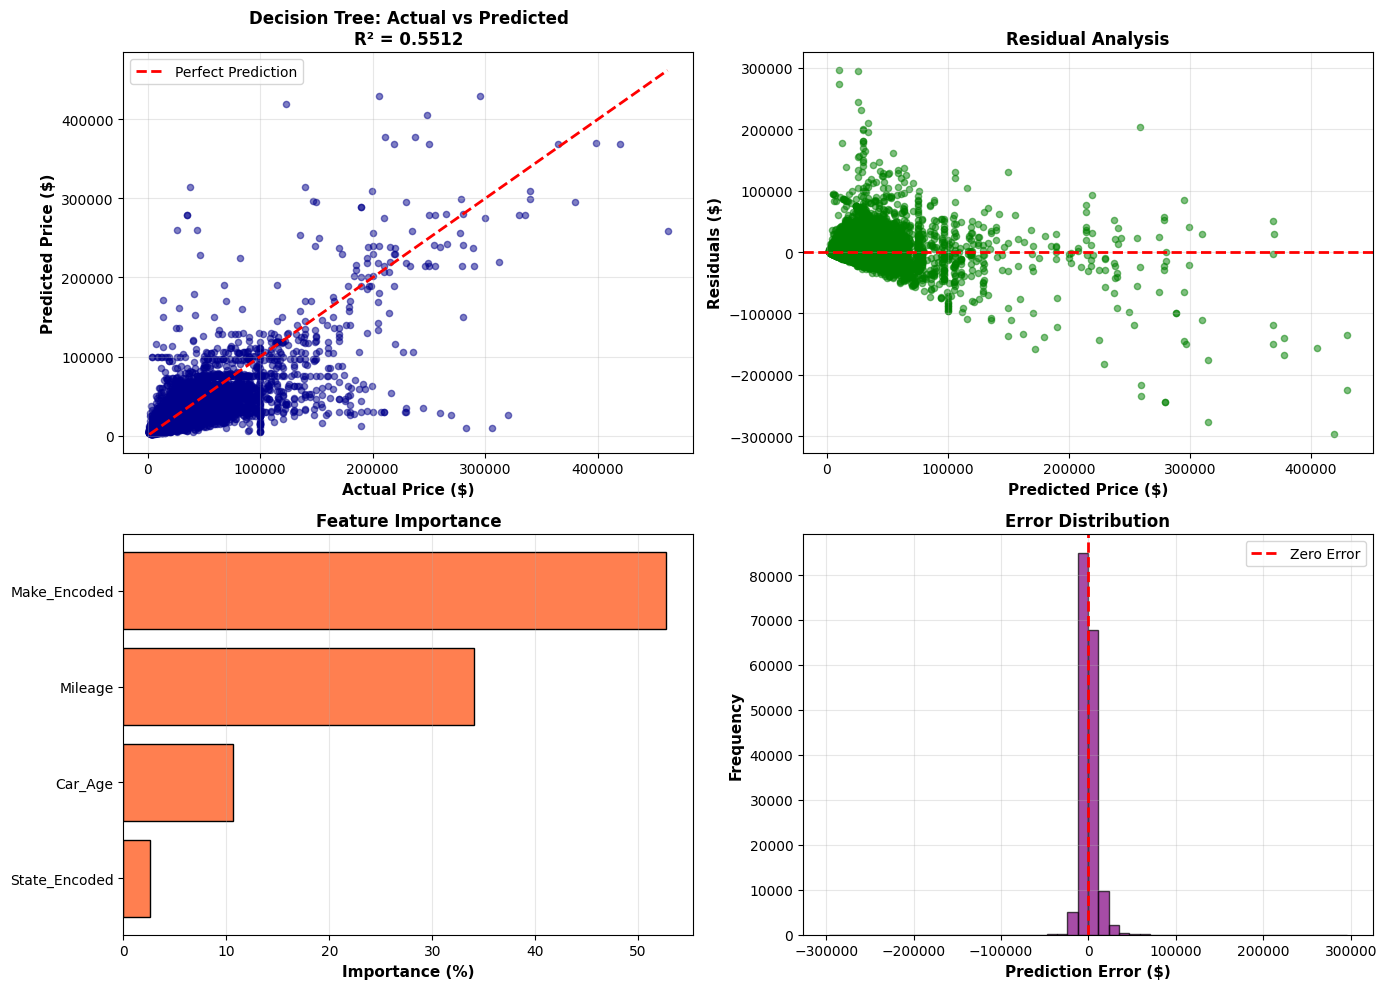


❌ OVERFITTING: Gap = 0.1057
Model explains 55.1% of price variance on test data

💡 Decision Tree Characteristics:
   • Single tree (faster than Random Forest)
   • Captures non-linear patterns
   • Interpretable decision rules
   • May overfit without depth limit
   • Available in production (app.py)


In [6]:
# Comprehensive Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='darkblue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_title(f'Decision Tree: Actual vs Predicted\nR² = {r2_test:.4f}', 
                     fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residual Analysis
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=20, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Residuals ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Residual Analysis', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance
axes[1, 0].barh(importance_df['Feature'], importance_df['Importance_Percent'], 
                color='coral', edgecolor='black')
axes[1, 0].set_xlabel('Importance (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Feature Importance', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Error Distribution
axes[1, 1].hist(residuals, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 1].set_xlabel('Prediction Error ($)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Error Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Overfitting check
r2_diff = r2_train - r2_test
if r2_diff < 0.05:
    status = "✅ GOOD FIT"
elif r2_diff < 0.10:
    status = "⚠️ SLIGHT OVERFITTING"
else:
    status = "❌ OVERFITTING"

print(f"\n{status}: Gap = {r2_diff:.4f}")
print(f"Model explains {r2_test*100:.1f}% of price variance on test data")
print(f"\n💡 Decision Tree Characteristics:")
print(f"   • Single tree (faster than Random Forest)")
print(f"   • Captures non-linear patterns")
print(f"   • Interpretable decision rules")
print(f"   • May overfit without depth limit")
print(f"   • Available in production (app.py)")

## 5. Summary & Production Deployment

**Model Performance:**
- Uses 4 engineered features (Car_Age, Mileage, Make_Encoded, State_Encoded)
- Captures non-linear relationships via tree splits
- Good balance between speed and accuracy

**Why Decision Tree in Production:**

✅ **Speed:** Faster than ensemble methods (single tree)  
✅ **Non-linear:** Captures complex patterns via splits  
✅ **Interpretable:** Can trace decision paths  
✅ **Flexible:** No feature scaling needed  
✅ **Deployment:** Available in Flask app (app.py)

**Production Configuration (model.py):**
```python
DecisionTreeRegressor(
    max_depth=15,
    random_state=42
)
```

**Pros & Cons:**
- **Pros:** Fast, interpretable, handles non-linearity
- **Cons:** Can overfit, less robust than ensembles, sensitive to small data changes

**Next Steps:**
- Compare with Ridge (baseline), Random Forest, and HistGradientBoosting
- Model is deployed in Flask API via `/api/predict` endpoint
- Users can select this model in the web interface